In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('./data.csv')


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


Data Preprocessing（資料前處理），是機器學習中最重要的一部分。在這邊大致可分為兩部份，前半部份算是一些對資料的觀察、分析(EDA)，後半部主要是針對特徵x進行離群值處理。

In [2]:
# 查看前五筆資料
data.head()

,x
0,0.7174
1,0.8448
2,0.7941
3,0.8158
4,0.8085


In [3]:
# 查看資料筆數
print('資料筆數：', data.shape[0])
print('特徵數：', data.shape[1])

資料筆數： 2998
特徵數： 1


In [4]:
# 查看資料分布狀況
data.describe()

,x
count,2998.000000
mean,0.797100
std,0.091927
min,0.333300
25%,0.750000
50%,0.803750
75%,0.864825
max,0.960000


## 箱型圖
透過 boxplot 來查看特徵 x 在 3143 筆資料中的分布狀況，我們可以看出平均值約 0.8，最大值接近 1，最小值接近 0。其中值大多介於0.6~1之間，其大的數目屬於零星的數量。

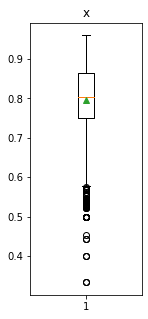

In [5]:
plt.figure(figsize=(2,5))
plt.boxplot(data['x'],showmeans=True)
plt.title('x')
plt.show()

## 分布狀態
從分布狀態與和密度估計圖可以發現，特徵 x 有左偏的情形。左偏(負偏)，表示有少數幾筆資料很小，故平均數<中位數，所以偏態係數SK<0。

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


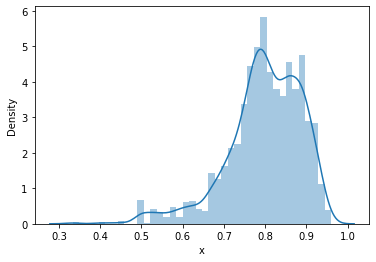

In [6]:
import seaborn as sns
sns.distplot(data['x'])
plt.show()

In [7]:
#skewness and kurtosis
print("偏態(Skewness): {:.2f}".format(data['x'].skew()))
print("峰度(Kurtosis): {:.2f}".format(data['x'].kurt()))

偏態(Skewness): -1.09
峰度(Kurtosis): 1.80


## 離群值處理
這裡提供兩種常見的方法來對資料進行處理，第一個是將左偏的資料取平方。第二種是透過分位數來移除離群值。


### 方法1: 特徵取平方
因為資料型態`左偏`，因此我們可以透過取平方來將資料拉回使為更集中。

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


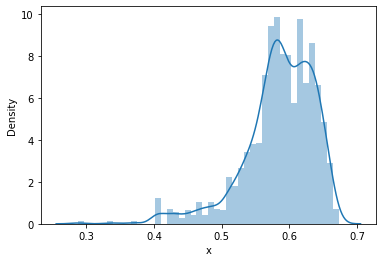

In [10]:
sns.distplot(np.log1p(data['x']))
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


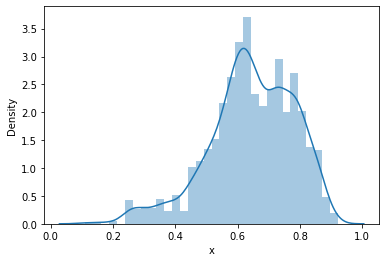

In [8]:
exp_data = np.power(data['x'], 2)
exp_data = exp_data.replace([np.inf, -np.inf, -0], 0)
sns.distplot(exp_data)
plt.show()

In [9]:
print("偏態(Skewness): {:.2f}".format(exp_data.skew()))

偏態(Skewness): -0.64


### 方法二: 移除離群值

In [10]:
# 將所有特徵超出1.5倍標準差的概念將這些Outlier先去掉，避免對Model造成影響
print ("Shape Of The Before Ouliers: ",data.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(data['x'],75) - np.percentile(data['x'],25)
#outlier = Q3 + n*IQR 
data=data[data['x'] < np.percentile(data['x'],75)+n*IQR]
#outlier = Q1 - n*IQR 
data=data[data['x'] > np.percentile(data['x'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",data.shape)

Shape Of The Before Ouliers:  (2998, 1)
Shape Of The After Ouliers:  (2897, 1)


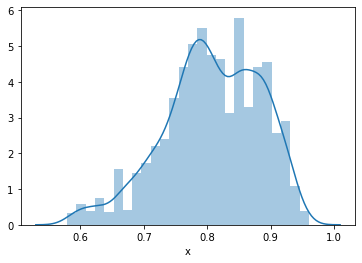

In [11]:
import seaborn as sns
sns.distplot(data['x'])
plt.show()

In [12]:
print("偏態(Skewness): {:.2f}".format(data['x'].skew()))

偏態(Skewness): -0.46
